# How Does an Outlier Sound Like?

In [3]:
# Sonifying Outliers Data
# Reading outliers.csv and sonifying timestamp vs is_outlier

import pandas as pd
import numpy as np
from astronify.series import SoniSeries
from astropy.table import Table
import matplotlib.pyplot as plt
from datetime import datetime

In [4]:
# Read the outliers CSV file
df = pd.read_csv('outliers.csv')

# Display basic info about the data
print("Dataset shape:", df.shape)
print("\nColumn names:")
print(df.columns.tolist())
print("\nFirst few rows:")
print(df.head())


Dataset shape: (37, 17)

Column names:
['fixture_id', 'market_id', 'bet_name', 'bet_line', 'provider_id', 'is_old_outlier', 'last_update_time', 'outlier_last_update_time', 'raw_odd', 'power_clean_odd', 'bet_status_id', 'sport_id', 'league_id', 'provider_name', 'fixture_name', 'message_guid', 'kafka_insertion_timestamp']

First few rows:
   fixture_id  market_id  bet_name  bet_line  provider_id  is_old_outlier  \
0    14407042          1         2       NaN            4           False   
1    14407042          1         2       NaN            4           False   
2    14407042          1         2       NaN            4           False   
3    14407042          1         2       NaN            4           False   
4    14407042          1         2       NaN            4           False   

           last_update_time  outlier_last_update_time  raw_odd  \
0  2024-12-26T17:33:03.481Z  2024-12-26T17:33:03.481Z    1.819   
1  2024-12-26T17:33:03.553Z  2024-12-26T17:33:03.481Z    1.819   


In [5]:
# Examine outlier status distribution
print("Outlier status distribution:")
print(df['is_old_outlier'].value_counts())
print("\nUnique values in is_old_outlier:", df['is_old_outlier'].unique())

Outlier status distribution:
is_old_outlier
False    33
True      4
Name: count, dtype: int64

Unique values in is_old_outlier: [False  True]


In [6]:
# Prepare data for sonification
# Convert timestamp to datetime and then to numerical values (seconds since first timestamp)
df['timestamp'] = pd.to_datetime(df['kafka_insertion_timestamp'])
df = df.sort_values('timestamp')

# Create time values relative to the first timestamp (in seconds)
start_time = df['timestamp'].iloc[0]
df['time_seconds'] = (df['timestamp'] - start_time).dt.total_seconds()

# Convert boolean outlier status to numeric (0 for False, 1 for True)
df['outlier_numeric'] = df['is_old_outlier'].astype(int)

# Display the prepared data
print("Prepared data:")
print(
    f"Time range: {df['time_seconds'].min():.1f} to {df['time_seconds'].max():.1f} seconds")
print(f"Duration: {df['time_seconds'].max()/60:.1f} minutes")
print(f"Outlier values: {df['outlier_numeric'].unique()}")
print(f"Number of outliers: {df['outlier_numeric'].sum()}")

# Show first few rows of prepared data
print("\nFirst few rows of prepared data:")
print(df[['time_seconds', 'outlier_numeric', 'timestamp']].head())

Prepared data:
Time range: 0.0 to 5436.6 seconds
Duration: 90.6 minutes
Outlier values: [0 1]
Number of outliers: 4

First few rows of prepared data:
   time_seconds  outlier_numeric                        timestamp
0         0.000                0 2024-12-26 17:33:03.553000+00:00
1         0.071                0 2024-12-26 17:33:03.624000+00:00
2         4.566                0 2024-12-26 17:33:08.119000+00:00
3         4.819                0 2024-12-26 17:33:08.372000+00:00
4       306.453                0 2024-12-26 17:38:10.006000+00:00


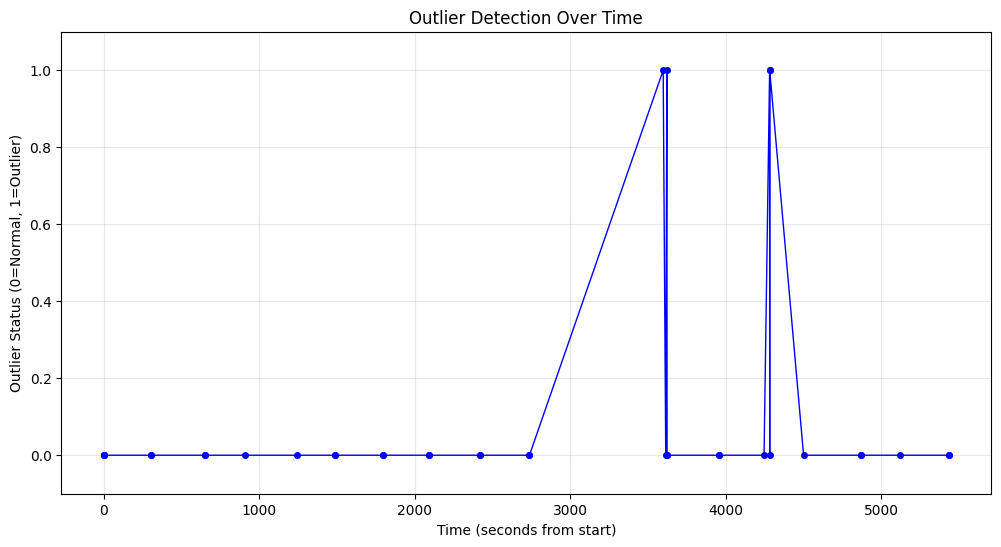

Total data points: 37
Outlier points: 4
Normal points: 33


In [7]:
# Visualize the data before sonification
plt.figure(figsize=(12, 6))
plt.plot(df['time_seconds'], df['outlier_numeric'],
         'bo-', markersize=4, linewidth=1)
plt.xlabel('Time (seconds from start)')
plt.ylabel('Outlier Status (0=Normal, 1=Outlier)')
plt.title('Outlier Detection Over Time')
plt.grid(True, alpha=0.3)
plt.ylim(-0.1, 1.1)
plt.show()

print(f"Total data points: {len(df)}")
print(f"Outlier points: {df['outlier_numeric'].sum()}")
print(f"Normal points: {len(df) - df['outlier_numeric'].sum()}")

In [15]:
outlier_table = Table()
outlier_table['time'] = df['time_seconds'].values
outlier_table['flux'] = df['outlier_numeric'].values

# Create SoniSeries object and configure sonification parameters
outlier_soni = SoniSeries(outlier_table)

# Configure pitch mapping for better audible distinction
# Lower pitch for normal data (0), higher pitch for outliers (1)
outlier_soni.pitch_mapper.pitch_map_args["pitch_range"] = [
    200, 2000]  # Wider range for clear distinction
# Center frequency
outlier_soni.pitch_mapper.pitch_map_args["center_pitch"] = 600
# Use median as reference
outlier_soni.pitch_mapper.pitch_map_args["zero_point"] = "median"

print("Pitch mapping configuration:")
print(outlier_soni.pitch_mapper.pitch_map_args)

Pitch mapping configuration:
{'pitch_range': [200, 2000], 'center_pitch': 600, 'zero_point': 'median', 'stretch': 'linear'}


In [16]:
# Sonify the outlier data
print("Sonifying outlier data...")
outlier_soni.sonify()
print("Sonification completed!")

Sonifying outlier data...
Sonification completed!


In [17]:
# Play the sonified outlier data
print("Playing sonified outlier data...")
print("Listen for:")
print("- Lower pitch tones = Normal data (is_outlier = False)")
print("- Higher pitch tones = Outliers (is_outlier = True)")
print()
outlier_soni.play()

Playing sonified outlier data...
Listen for:
- Lower pitch tones = Normal data (is_outlier = False)
- Higher pitch tones = Outliers (is_outlier = True)

Pyo warning: Portaudio input device `MacBook Pro Microphone` has fewer channels (1) than requested (2).
Pyo warning: Portmidi warning: no midi device found!
Portmidi closed.


In [11]:
# Stop playback if needed
# outlier_soni.stop()

# Optional: Save the sonification to a file
# outlier_soni.write("outliers_sonification.wav")
print("To stop playback: outlier_soni.stop()")
print("To save audio: outlier_soni.write('outliers_sonification.wav')")

To stop playback: outlier_soni.stop()
To save audio: outlier_soni.write('outliers_sonification.wav')


In [ ]:
# Create an Astropy table for sonification (as required by SoniSeries)
# SoniSeries expects a table with 'time' and 'flux' columns
outlier_table = Table()
outlier_table['time'] = df['time_seconds'].values
outlier_table['flux'] = df['outlier_numeric'].values

print("Created table for sonification:")
print(f"Time column: {len(outlier_table['time'])} values")
print(f"Flux column: {len(outlier_table['flux'])} values")
print(
    f"Time range: {outlier_table['time'].min():.1f} to {outlier_table['time'].max():.1f}")
print(
    f"Flux range: {outlier_table['flux'].min()} to {outlier_table['flux'].max()}")